# Decision Tree Regression

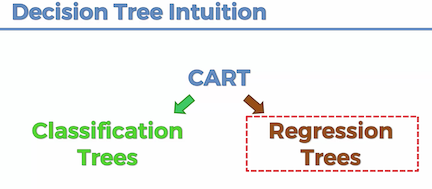

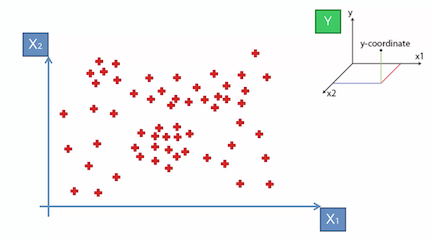

## The algorithm finds the optimal splits for the variables using form of either mathematical entropy, gini impurity, or variance. Basically though, all of them look to find splits that result in the lowest variance or entropy in the dataset. Variance between the nodes is specifically used for regression decision trees. By nodes, I mean the splits, like looking at heart rate data and choosing one of the splits to be by a certain state. The alogorithm continues splitting the data to find the lowest variance based on splits. 

Look here for more info as this is a complex process that our library takes care of for us: https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

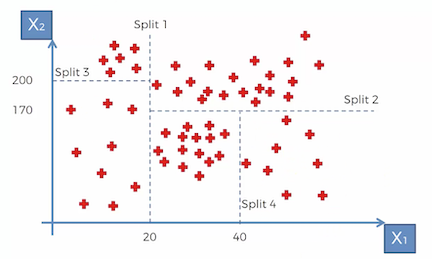

## Once the optimal splits are found the model/algorithm uses the splits to define what are called the terminal leafs and the values are averaged based on the decision tree splits. This is conceptual done using a decision tree because in actuality it does not visualize well due to 3-D space with multivariable models. New values go through the decision tree and are placed in the proper leafs.

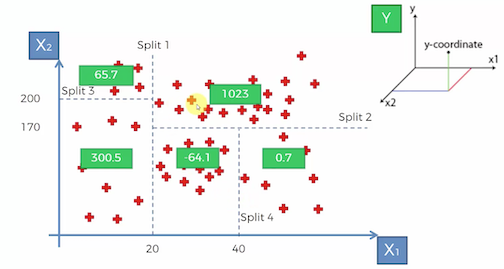

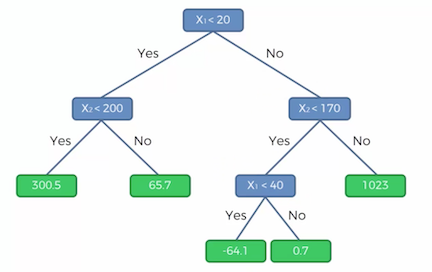

## Importing the libraries

In [3]:
# Important Note*** You do not have to apply feature scaling to decision tree regression or random forest regression
# because the predictions are from the splits from nodes of the trees as opposed to an equation that needs scaling

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
# Make sure to check the iloc rows/columns being chosen for each dataset
# We do not need to encode anything as there are no categorical features or dependent variables
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Decision Tree Regression model on the whole dataset

In [14]:
# We do this because the dataset is small and train test split is not appropriate with only 10 observations
# Decision tree regression predicts a numerical value whereas classifier predicts a category
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [19]:
# since there was no feature scaling this is very easy, note that this model is not well suited for the single feature dataset/predictions
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

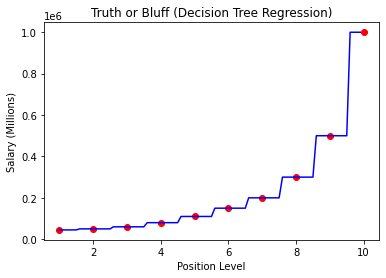

In [25]:
# Note that this is clearly not well adapted to 2-d datasets that have 1 feature and a dep var., DCR works best with many features in a model
# In 3-d models the graphing would be useless anyways but is visualized to help learn it conceptually

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary (Millions)')
plt.show()

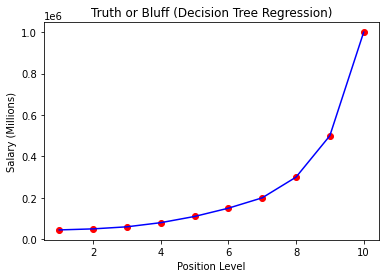

In [26]:
# This is just to show that when not in high resolution the graph is useless as it simply shows the salaries at the levels
# In 3-d models the graphing would be useless anyways.
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary (Millions)')
plt.show()